# Q1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [ ]:
np.random.seed(42)

class Action:

  def __init__(self,mean,std,Q,step,t):
    self.mean = mean
    self.std = std
    self.Q = Q
    self.k = 0
    self.step = step
    self.t = t

  def Update_Value(self,R):
    self.k = self.k + 1
    if self.t =='const':
      self.Q = self.Q + (self.step*(R-self.Q))
    elif self.t == 'var':
      self.Q = self.Q + (1/self.k)*(R-self.Q)

  def Get_Reward(self): 
    return (np.random.normal(self.mean,self.std,1) + np.random.normal(0,1,1))[0]

def run_experiment(Arms,mean,std,Q,step,t,epi,N):
      
  action = [Action(mean[i],std[i],Q,step,t) for i in range(Arms)]
  
  data = []
  armno = []
  
  if epi is None:
    for i in range(N):
      j = np.argmax([a.Q for a in action])
      R = action[j].Get_Reward()
      action[j].Update_Value(R)
      data.append(R)
      armno.append(j)
  else :
    for i in range(N):
      p = np.random.random()
      if p<epi:
        j = np.random.choice(Arms)
      else: 
        j = np.argmax([a.Q for a in action])
      R = action[j].Get_Reward()
      action[j].Update_Value(R)
      data.append(R)
      armno.append(j)
  
  return data , armno


def Reward_Optimal_Action(Arms,mean,std,Q,step,t,epi,N,trails,opt,max_mean):
  Reward_Matrix = []
  Arm_Matrix = []
  for j in range(trails):
    Total_Reward , Arm = run_experiment(Arms,mean,std,Q,step,t,epi,N)
    Reward_Matrix.append(Total_Reward)
    Arm_Matrix.append(Arm)

  Reward_Matrix = np.array(Reward_Matrix)
  Arm_Matrix = np.array(Arm_Matrix)

  Exp_Reward = np.mean(Reward_Matrix,axis=0)
  Optimal_Action = (Arm_Matrix==opt).mean(axis=0)


  return Exp_Reward  , Optimal_Action , np.abs(Exp_Reward-max_mean)



In [ ]:
np.random.seed(42)
mean = [np.random.normal(0,1,1) for i in range(10)]
std = [1 for _ in range(10)]
opt = mean.index(max(mean))

In [ ]:
np.random.seed(42)
epilist = [0,0.1,0.01]
exp_list = []
opt_list = []
error_list = []
for i in range(len(epilist)):
  a , b , c = Reward_Optimal_Action(Arms=10,mean=mean,std=std,Q=0,step=0.1,t='var',epi=epilist[i],N=1000,trails=2000,opt=opt,max_mean=max(mean))
  exp_list.append(a)
  opt_list.append(b)
  error_list.append(c)


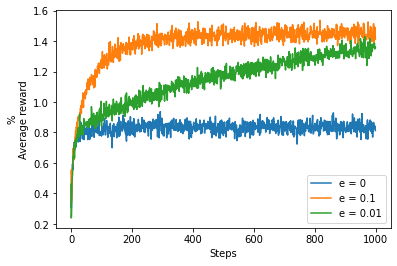

In [ ]:
for i in range(len(epilist)):
  plt.plot(exp_list[i],label='e = '+str(epilist[i]))
plt.xlabel('Steps')
plt.ylabel('%\nAverage reward')
plt.legend()
plt.show()  

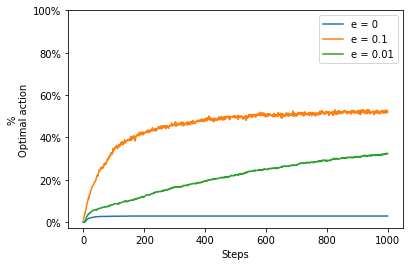

In [ ]:
for i in range(len(epilist)):
  plt.plot(opt_list[i],label='e = '+str(epilist[i]))
plt.xlabel('Steps')
plt.ylabel('%\nOptimal action')
plt.yticks(np.arange(0,1.1,0.2),[str(i)+'%' for i in range(0,101,20)])
plt.legend()
plt.show()  

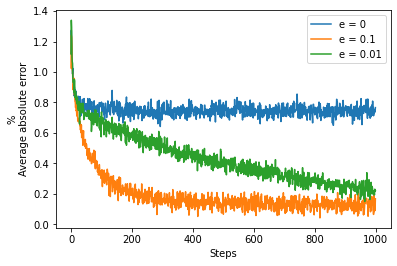

In [ ]:
for i in range(len(epilist)):
  plt.plot(error_list[i],label='e = '+str(epilist[i]))
plt.xlabel('Steps')
plt.ylabel('%\nAverage absolute error')
plt.legend()
plt.show()  

## Epsilon Rate Changes


In [ ]:
np.random.seed(42)

class Action:

  def __init__(self,mean,std,Q,step,t):
    self.mean = mean
    self.std = std
    self.Q = Q
    self.k = 0
    self.step = step
    self.t = t

  def Update_Value(self,R):
    self.k = self.k + 1
    if self.t =='const':
      self.Q = self.Q + (self.step*(R-self.Q))
    elif self.t == 'var':
      self.Q = self.Q + (1/self.k)*(R-self.Q)

  def Get_Reward(self): 
    return (np.random.normal(self.mean,self.std,1) + np.random.normal(0,1,1))[0]

def run_experiment_epi(Arms,mean,std,Q,step,t,epi,N,epi_step):
      
  action = [Action(mean[i],std[i],Q,step,t) for i in range(Arms)]
  
  data = []
  armno = []
  
  if epi is None:
    for i in range(N):
      j = np.argmax([a.Q for a in action])
      R = action[j].Get_Reward()
      action[j].Update_Value(R)
      data.append(R)
      armno.append(j)
  else :
    for i in range(N):
      p = np.random.random()
      epi = epi*(1/(1 + epi_step*i))
      if p<epi:
        j = np.random.choice(Arms)
      else: 
        j = np.argmax([a.Q for a in action])
      R = action[j].Get_Reward()
      action[j].Update_Value(R)
      data.append(R)
      armno.append(j)
  
  return data , armno


def Reward_Optimal_Action_epi(Arms,mean,std,Q,step,t,epi,N,trails,opt,max_mean,epi_step):
  Reward_Matrix = []
  Arm_Matrix = []
  for j in range(trails):
    Total_Reward , Arm = run_experiment_epi(Arms,mean,std,Q,step,t,epi,N,epi_step)
    Reward_Matrix.append(Total_Reward)
    Arm_Matrix.append(Arm)

  Reward_Matrix = np.array(Reward_Matrix)
  Arm_Matrix = np.array(Arm_Matrix)

  Exp_Reward = np.mean(Reward_Matrix,axis=0)
  Optimal_Action = (Arm_Matrix==opt).mean(axis=0)


  return Exp_Reward  , Optimal_Action , np.abs(Exp_Reward-max_mean)



In [ ]:
np.random.seed(42)
mean = [np.random.normal(0,1,1) for i in range(10)]
std = [1 for _ in range(10)]
opt = mean.index(max(mean))

In [ ]:
np.random.seed(42)
epilist = [0,0.1,0.01]
exp_list = []
opt_list = []
error_list = []
for i in range(len(epilist)):
  a , b , c = Reward_Optimal_Action_epi(Arms=10,mean=mean,std=std,Q=0,step=0.1,t='var',epi=epilist[i],N=1000,trails=2000,opt=opt,max_mean=max(mean),epi_step=0.001)
  exp_list.append(a)
  opt_list.append(b)
  error_list.append(c)


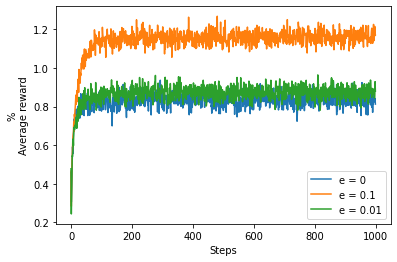

In [ ]:
for i in range(len(epilist)):
  plt.plot(exp_list[i],label='e = '+str(epilist[i]))
plt.xlabel('Steps')
plt.ylabel('%\nAverage reward')
plt.legend()
plt.show()  

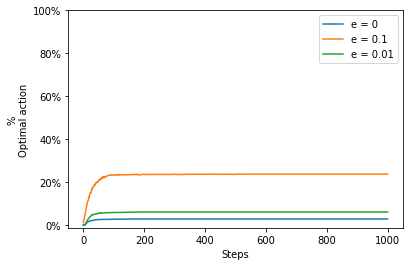

In [ ]:
for i in range(len(epilist)):
  plt.plot(opt_list[i],label='e = '+str(epilist[i]))
plt.xlabel('Steps')
plt.ylabel('%\nOptimal action')
plt.yticks(np.arange(0,1.1,0.2),[str(i)+'%' for i in range(0,101,20)])
plt.legend()
plt.show()  

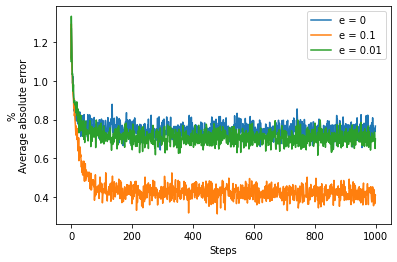

In [ ]:
for i in range(len(epilist)):
  plt.plot(error_list[i],label='e = '+str(epilist[i]))
plt.xlabel('Steps')
plt.ylabel('%\nAverage absolute error')
plt.legend()
plt.show()  

# Q2


In [ ]:
np.random.seed(42)
mean = [np.random.normal(0,1,1) for i in range(10)]
std = [2 for _ in range(10)]
opt = mean.index(max(mean))

In [ ]:
np.random.seed(42)
epilist = [0,0.1,0.01]
exp_list = []
opt_list = []
error_list = []

for i in range(len(epilist)):
  a , b , c = Reward_Optimal_Action(Arms=10,mean=mean,std=std,Q=0,step=0.1,t='var',epi=epilist[i],N=1000,trails=2000,opt=opt,max_mean=max(mean))
  exp_list.append(a)
  opt_list.append(b)
  error_list.append(c)



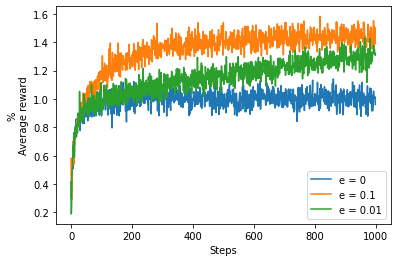

In [ ]:
for i in range(len(epilist)):
  plt.plot(exp_list[i],label='e = '+str(epilist[i]))
plt.xlabel('Steps')
plt.ylabel('%\nAverage reward')
plt.legend()
plt.show() 

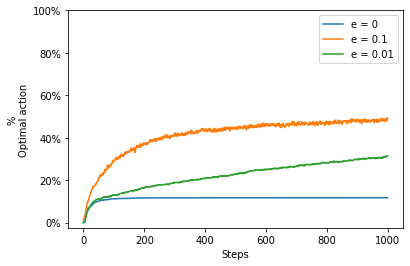

In [ ]:
for i in range(len(epilist)):
  plt.plot(opt_list[i],label='e = '+str(epilist[i]))
plt.xlabel('Steps')
plt.ylabel('%\nOptimal action')
plt.yticks(np.arange(0,1.1,0.2),[str(i)+'%' for i in range(0,101,20)])
plt.legend()
plt.show()  

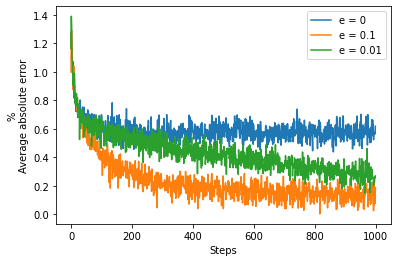

In [ ]:
for i in range(len(epilist)):
  plt.plot(error_list[i],label='e = '+str(epilist[i]))
plt.xlabel('Steps')
plt.ylabel('%\nAverage absolute error')
plt.legend()
plt.show()  

## Epsilon Rate Changes


In [ ]:
np.random.seed(42)
epilist = [0,0.1,0.01]
exp_list = []
opt_list = []
error_list = []
for i in range(len(epilist)):
  a , b , c = Reward_Optimal_Action_epi(Arms=10,mean=mean,std=std,Q=0,step=0.1,t='var',epi=epilist[i],N=1000,trails=2000,opt=opt,max_mean=max(mean),epi_step=0.001)
  exp_list.append(a)
  opt_list.append(b)
  error_list.append(c)


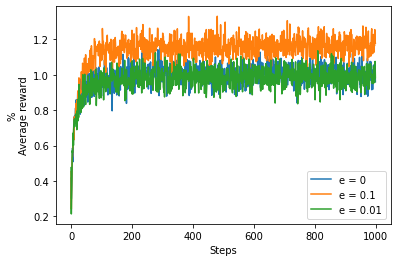

In [ ]:
for i in range(len(epilist)):
  plt.plot(exp_list[i],label='e = '+str(epilist[i]))
plt.xlabel('Steps')
plt.ylabel('%\nAverage reward')
plt.legend()
plt.show()  

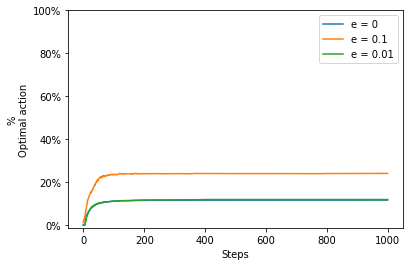

In [ ]:
for i in range(len(epilist)):
  plt.plot(opt_list[i],label='e = '+str(epilist[i]))
plt.xlabel('Steps')
plt.ylabel('%\nOptimal action')
plt.yticks(np.arange(0,1.1,0.2),[str(i)+'%' for i in range(0,101,20)])
plt.legend()
plt.show()  

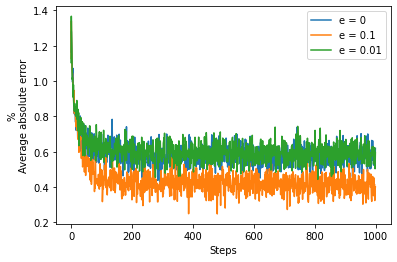

In [ ]:
for i in range(len(epilist)):
  plt.plot(error_list[i],label='e = '+str(epilist[i]))
plt.xlabel('Steps')
plt.ylabel('%\nAverage absolute error')
plt.legend()
plt.show()  

# Q3

In [ ]:
print('Percentage of optimal action over 2000 trails and 1000 time stamps : ')
for i in range(3):
  print('For epi = ',epilist[i],' : ',round((opt_list[i][len(opt_list[i])-1])*100,4),'%')

print('Average cumulative rewards 2000 trails and 1000 time stamps : ')
for i in range(3):
  print('For epi = ',epilist[i],' : ',exp_list[i][len(exp_list[i])-1])

Percentage of optimal action over 2000 trails and 1000 time stamps : 
For epi =  0  :  11.7 %
For epi =  0.1  :  48.7 %
For epi =  0.01  :  31.35 %
Average cumulative rewards 2000 trails and 1000 time stamps : 
For epi =  0  :  0.9606138929607648
For epi =  0.1  :  1.3930982987593068
For epi =  0.01  :  1.308646743606365


# Q5


In [8]:
np.random.seed(100)

class Action:

  def __init__(self,mean,std,Q,step,t):
    self.mean = mean
    self.std = std
    self.Q = Q
    self.k = 0
    self.step = step
    self.t = t

  def Update_Value(self,R):
    self.k = self.k + 1
    if self.t =='const':
      self.Q = self.Q + (self.step*(R-self.Q))
    elif self.t == 'var':
      self.Q = self.Q + (1/self.k)*(R-self.Q)

  def Get_Reward(self): 
    return (np.random.normal(self.mean,self.std,1) + np.random.normal(0,1,1))[0]

def run_experiment(Arms,mean,std,Q,step,t,epi,N):
      
  action = [Action(mean[i],std[i],Q,step,t) for i in range(Arms)]
  
  data = []
  armno = []
  
  if epi is None:
    for i in range(N):
      update_mean = np.random.normal(0,0.01,1)[0]
      for a in action :
        a.mean = a.mean + update_mean
      j = np.argmax([a.Q for a in action])
      R = action[j].Get_Reward()
      action[j].Update_Value(R)
      data.append(R)
      armno.append(j)
  else :
    for i in range(N):
      update_mean = np.random.normal(0,0.01,1)[0]
      for a in action :
        a.mean = a.mean + update_mean
      p = np.random.random()
      if p<epi:
        j = np.random.choice(Arms)
      else: 
        j = np.argmax([a.Q for a in action])
      R = action[j].Get_Reward()
      action[j].Update_Value(R)
      data.append(R)
      armno.append(j)
  
  return data , armno


def Reward_Optimal_Action(Arms,mean,std,Q,step,t,epi,N,trails,opt):
  Reward_Matrix = []
  Arm_Matrix = []
  for j in range(trails):
    Total_Reward , Arm = run_experiment(Arms,mean,std,Q,step,t,epi,N)
    Reward_Matrix.append(Total_Reward)
    Arm_Matrix.append(Arm)

  Reward_Matrix = np.array(Reward_Matrix)
  Arm_Matrix = np.array(Arm_Matrix)

  Exp_Reward = np.mean(Reward_Matrix,axis=0)
  Optimal_Action = (Arm_Matrix==opt).mean(axis=0)

  return Exp_Reward  , Optimal_Action



In [9]:
np.random.seed(100)
mean = [np.random.normal(0,1,1) for i in range(10)]
std = [1 for _ in range(10)]
opt = mean.index(max(mean))

In [10]:
e1 , opt1 = Reward_Optimal_Action(Arms = 10,mean=mean,std=std,Q=0,step=0.1,t='const',epi=0.1,N=10000,trails=2000,opt=opt)
e2 , opt2 = Reward_Optimal_Action(Arms = 10,mean=mean,std=std,Q=0,step=None,t='var',epi=0.1,N=10000,trails=2000,opt=opt)


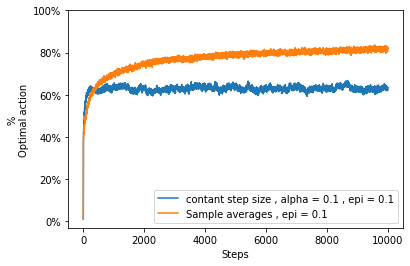

In [11]:
plt.plot(opt1,label='contant step size , alpha = 0.1 , epi = 0.1')
plt.plot(opt2,label='Sample averages , epi = 0.1')
plt.xlabel('Steps')
plt.ylabel('%\nOptimal action')
plt.yticks(np.arange(0,1.1,0.2),[str(i)+'%' for i in range(0,101,20)])
plt.legend()
plt.show()

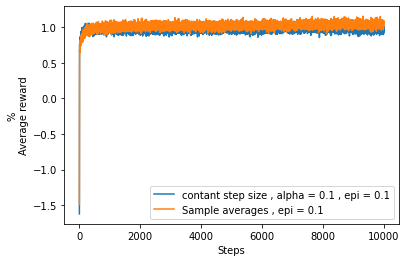

In [12]:
plt.plot(e1,label='contant step size , alpha = 0.1 , epi = 0.1')
plt.plot(e2,label='Sample averages , epi = 0.1')
plt.xlabel('Steps')
plt.ylabel('%\nAverage reward')
plt.legend()
plt.show()  

# Q6

In [ ]:
def run_experiment_ucb(Arms,mean,std,Q,method,step,t,epi,c,N):
      
  action = [Action(mean[i],std[i],Q,step,t) for i in range(Arms)]
  
  data = []
  armno = []
  
  if method=='ucb':
    for i in range(N):
      j = np.argmax([(a.Q + c*(math.log(max(i,1))/(a.k+1))**0.5) for a in action])
      R = action[j].Get_Reward()
      action[j].Update_Value(R)
      data.append(R)
      armno.append(j)
  elif method=='epi':
    for i in range(N):
      p = np.random.random()
      if p<epi:
        j = np.random.choice(Arms)
      else: 
        j = np.argmax([a.Q for a in action])
      R = action[j].Get_Reward()
      action[j].Update_Value(R)
      data.append(R)
      armno.append(j)
  
  return data , armno


def Reward_Optimal_Action_Ucb(Arms,mean,std,Q,method,step,t,epi,c,N,trails,opt):
  Reward_Matrix = []
  Arm_Matrix = []
  for j in range(trails):
    Total_Reward , Arm = run_experiment_ucb(Arms,mean,std,Q,method,step,t,epi,c,N)
    
    Reward_Matrix.append(Total_Reward)
    Arm_Matrix.append(Arm)

  Reward_Matrix = np.array(Reward_Matrix)
  Arm_Matrix = np.array(Arm_Matrix)

  Exp_Reward = np.mean(Reward_Matrix,axis=0)
  Optimal_Action = (Arm_Matrix==opt).mean(axis=0)

  return Exp_Reward  , Optimal_Action


In [ ]:
mean = [np.random.normal(0,1,1) for i in range(10)]
std = [1 for _ in range(10)]
opt = mean.index(max(mean))

In [ ]:
e1 , opt1 = Reward_Optimal_Action_Ucb(Arms = 10,mean=mean,std=std,Q=0,method='ucb',step=None,t='var',epi=None,c = 2,N=1000,trails=2000,opt=opt)
e2 , opt2 = Reward_Optimal_Action_Ucb(Arms = 10,mean=mean,std=std,Q=0,method='epi',step=None,t='var',epi=0.1,c = None,N=1000,trails=2000,opt=opt)


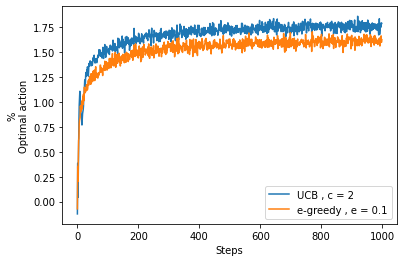

In [ ]:
plt.plot(e1,label='UCB , c = 2')
plt.plot(e2,label='e-greedy , e = 0.1')
plt.xlabel('Steps')
plt.ylabel('%\nOptimal action')
plt.legend()
plt.show()

In [ ]:
e3 , opt3 = Reward_Optimal_Action_Ucb(Arms = 10,mean=mean,std=std,Q=0,method='ucb',step=None,t='var',epi=None,c = 1,N=1000,trails=2000,opt=opt)
e4 , opt4 = Reward_Optimal_Action_Ucb(Arms = 10,mean=mean,std=std,Q=0,method='ucb',step=None,t='var',epi=None,c = 4,N=1000,trails=2000,opt=opt)


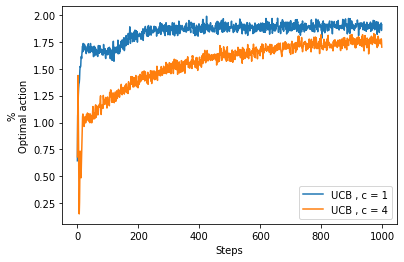

In [ ]:
plt.plot(e3,label='UCB , c = 1')
plt.plot(e4,label='UCB , c = 4')
plt.xlabel('Steps')
plt.ylabel('%\nOptimal action')
plt.legend()
plt.show()

# Q7

In [ ]:
np.random.seed(42)

class GradientAction:

  def __init__(self,armno,mean,std,step,t,H):
    self.armno = armno
    self.mean = mean
    self.std = std
    self.k = 0
    self.step = step
    self.t = t
    self.H = H
    
  def Update_Pref(self,actionno,R,Ravg,prob):
    self.k = self.k + 1
    if self.t =='const':
      if actionno==self.armno:
        self.H = self.H + (self.step*(R-Ravg)*(1-prob))
      else :
        self.H = self.H - (self.step*(R-Ravg)*prob)
    elif self.t == 'var':
      if actionno==self.armno:
        self.H = self.H + ((1/self.k)*(R-Ravg)*(1-prob))
      else :
        self.H = self.H - ((1/self.k)*(R-Ravg)*prob)

  def Get_Reward(self): 
    return (np.random.normal(self.mean,self.std,1) + np.random.normal(0,1,1))[0]

def softmax(x):
  softmaxv = [math.exp(i) for i in x]
  return np.array([softmaxv[i]/sum(softmaxv) for i in range(len(x))])

def run_experiment_grad(Arms,mean,std,H,baseline,step,t,N):
      
  action = [GradientAction(i,mean[i],std[i],step,t,H) for i in range(Arms)]
  
  data = []
  armno = []
  
  if baseline is True:
    for i in range(N):
      probs = softmax([a.H for a in action])
      j = np.argmax(probs)
      R = action[j].Get_Reward()
      data.append(R)
      armno.append(j)
      Ravg = sum(data)/len(data)

      for k in range(Arms):
        action[k].Update_Pref(j,R,Ravg,probs[k])
  else :
    for i in range(N):
      probs = softmax([a.H for a in action])
      j = np.argmax(probs)
      R = action[j].Get_Reward()
      data.append(R)
      armno.append(j)
      for k in range(Arms):
        action[k].Update_Pref(j,R,0,probs[k])  
  return data , armno

def Reward_Optimal_Action_grad(Arms,mean,std,H,baseline,step,t,N,trails,opt):
  Reward_Matrix = []
  Arm_Matrix = []
  for j in range(trails):
    Total_Reward , Arm = run_experiment_grad(Arms,mean,std,H,baseline,step,t,N)
    Reward_Matrix.append(Total_Reward)
    Arm_Matrix.append(Arm)

  Reward_Matrix = np.array(Reward_Matrix)
  Arm_Matrix = np.array(Arm_Matrix)

  Exp_Reward = np.mean(Reward_Matrix,axis=0)
  Optimal_Action = (Arm_Matrix==opt).mean(axis=0)

  return Exp_Reward  , Optimal_Action



In [ ]:
mean = [np.random.normal(4,1,1) for i in range(10)]
std = [1 for _ in range(10)]
opt = mean.index(max(mean))

In [ ]:
e1 , opt1 = Reward_Optimal_Action_grad(Arms = 10,mean=mean,std=std,H=0,baseline=True,step=0.1,t='const',N=1000,trails=2000,opt=opt)
e2 , opt2 = Reward_Optimal_Action_grad(Arms = 10,mean=mean,std=std,H=0,baseline=True,step=0.4,t='const',N=1000,trails=2000,opt=opt)
e3 , opt3 = Reward_Optimal_Action_grad(Arms = 10,mean=mean,std=std,H=0,baseline=False,step=0.1,t='const',N=1000,trails=2000,opt=opt)
e4 , opt4 = Reward_Optimal_Action_grad(Arms = 10,mean=mean,std=std,H=0,baseline=False,step=0.4,t='const',N=1000,trails=2000,opt=opt)

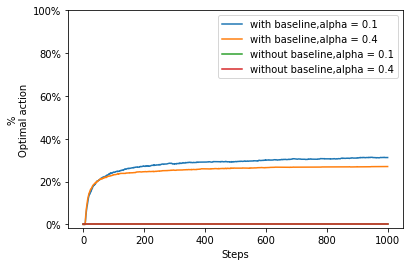

In [ ]:
plt.plot(opt1,label='with baseline,alpha = 0.1')
plt.plot(opt2,label='with baseline,alpha = 0.4')
plt.plot(opt3,label='without baseline,alpha = 0.1')
plt.plot(opt4,label='without baseline,alpha = 0.4')
plt.xlabel('Steps')
plt.ylabel('%\nOptimal action')
plt.yticks(np.arange(0,1.1,0.2),[str(i)+'%' for i in range(0,101,20)])
plt.legend()
plt.show()

# Experiment 


In [3]:
np.random.seed(100)

class Action:

  def __init__(self,mean,std,Q,step,t):
    self.mean = mean
    self.std = std
    self.Q = Q
    self.k = 0
    self.step = step
    self.t = t

  def Update_Value(self,R):
    self.k = self.k + 1
    if self.t =='const':
      self.Q = self.Q + (self.step*(R-self.Q))
    elif self.t == 'var':
      self.Q = self.Q + (1/self.k)*(R-self.Q)

  def Get_Reward(self): 
    return (np.random.normal(self.mean,self.std,1) + np.random.normal(0,1,1))[0]

def run_experiment(Arms,mean,std,Q,step,t,epi,N):
      
  action = [Action(mean[i],std[i],Q,step,t) for i in range(Arms)]
  
  data = []
  armno = []

  if epi is None:
    for i in range(N):
      update_mean = np.random.normal(0,0.01,1)[0]
      for a in action :
        a.mean = a.mean + update_mean
      j = np.argmax([a.Q for a in action])
      R = action[j].Get_Reward()
      action[j].Update_Value(R)
      data.append(R)
      armno.append(j)
  else :
    for i in range(N):
      update_mean = np.random.normal(0,0.01,1)[0]
      for a in action :
        a.mean = a.mean + update_mean
      p = np.random.random()
      if p<epi:
        j = np.random.choice(Arms)
      else: 
        j = np.argmax([a.Q for a in action])
      R = action[j].Get_Reward()
      action[j].Update_Value(R)
      data.append(R)
      armno.append(j)
  
  return data , armno


def Reward_Optimal_Action(Arms,mean,std,Q,step,t,epi,N,trails,opt):
  Reward_Matrix = []
  Arm_Matrix = []
  for j in range(trails):
    Total_Reward , Arm = run_experiment(Arms,mean,std,Q,step,t,epi,N)
    Reward_Matrix.append(Total_Reward)
    Arm_Matrix.append(Arm)

  Reward_Matrix = np.array(Reward_Matrix)
  Arm_Matrix = np.array(Arm_Matrix)

  Exp_Reward = np.mean(Reward_Matrix,axis=0)
  Optimal_Action = (Arm_Matrix==opt).mean(axis=0)

  return Exp_Reward  , Optimal_Action



In [4]:
np.random.seed(100)
mean = [np.random.normal(0,1,1) for i in range(10)]
std = [1 for _ in range(10)]
opt = mean.index(max(mean))

In [5]:
e1 , opt1 = Reward_Optimal_Action(Arms = 10,mean=mean,std=std,Q=0,step=0.1,t='const',epi=0.1,N=100,trails=2000,opt=opt)
e2 , opt2 = Reward_Optimal_Action(Arms = 10,mean=mean,std=std,Q=0,step=None,t='var',epi=0.1,N=100,trails=2000,opt=opt)
